<h1 align='center'> Introduction to Bagging</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Label Encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [9]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

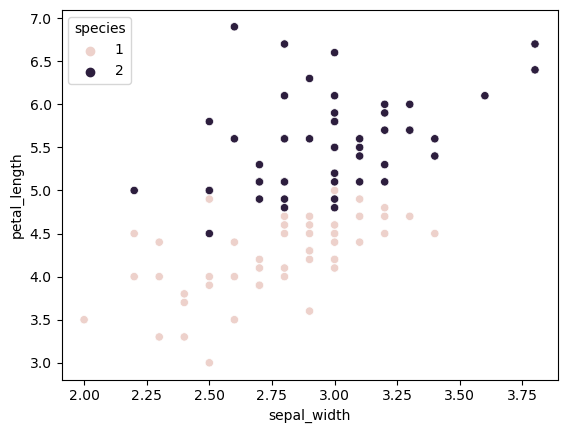

In [10]:
sns.scatterplot(df['sepal_width'],df['petal_length'], hue=df['species'])

In [11]:
df.shape

(100, 3)

In [12]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10) #Train data
df_val = df.iloc[60:80,:].sample(5) #Cross-validation
df_test = df.iloc[80:,:].sample(5) #Test data

In [13]:
df_train

,sepal_width,petal_length,species
117,3.8,6.7,2
122,2.8,6.7,2
85,3.4,4.5,1
136,3.4,5.6,2
112,3.0,5.5,2
63,2.9,4.7,1
110,3.2,5.1,2
130,2.8,6.1,2
95,3.0,4.2,1
107,2.9,6.3,2


In [14]:
df_val

,sepal_width,petal_length,species
93,2.3,3.3,1
64,2.9,3.6,1
102,3.0,5.9,2
144,3.3,5.7,2
142,2.7,5.1,2


In [15]:
df_test

,sepal_width,petal_length,species
83,2.7,5.1,1
50,3.2,4.7,1
72,2.5,4.9,1
78,2.9,4.5,1
129,3.0,5.8,2


In [16]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [17]:
y_test

array([1, 1, 2, 2, 2])

### Case1 : Bagging

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [37]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [33]:
# Data for tree1 
df_bag = df_train.sample(8, replace=True)
X =df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [34]:
df_train

,sepal_width,petal_length,species
117,3.8,6.7,2
122,2.8,6.7,2
85,3.4,4.5,1
136,3.4,5.6,2
112,3.0,5.5,2
63,2.9,4.7,1
110,3.2,5.1,2
130,2.8,6.1,2
95,3.0,4.2,1
107,2.9,6.3,2


In [35]:
df_bag

,sepal_width,petal_length,species
107,2.9,6.3,2
107,2.9,6.3,2
122,2.8,6.7,2
95,3.0,4.2,1
107,2.9,6.3,2
85,3.4,4.5,1
130,2.8,6.1,2
130,2.8,6.1,2


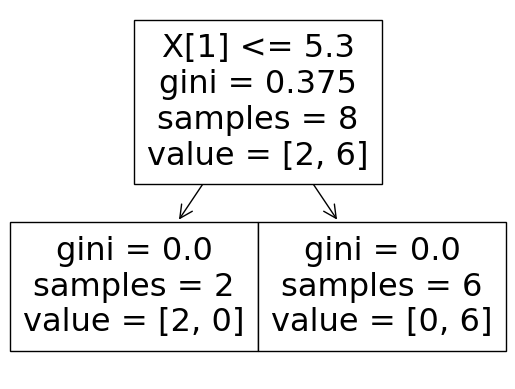

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


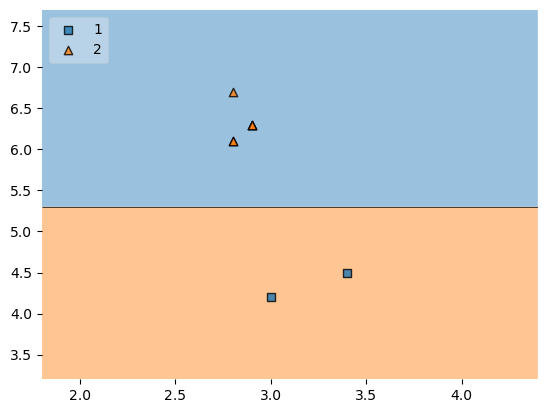

In [38]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

- Here for sample we set replace=True meanse there is posibility of repitation of row

In [32]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
63,2.9,4.7,1
117,3.8,6.7,2
136,3.4,5.6,2
122,2.8,6.7,2
85,3.4,4.5,1
117,3.8,6.7,2
107,2.9,6.3,2
117,3.8,6.7,2


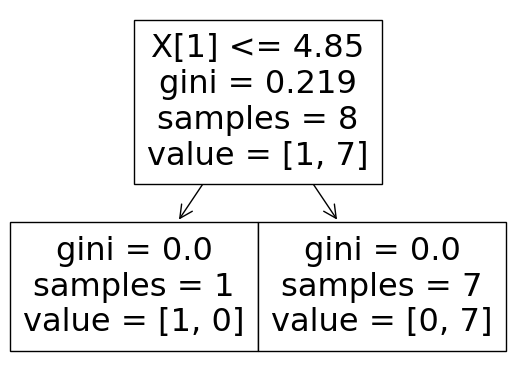

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


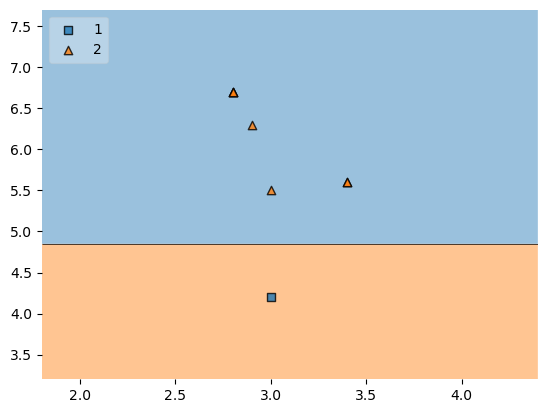

In [25]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [39]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
63,2.9,4.7,1
112,3.0,5.5,2
117,3.8,6.7,2
112,3.0,5.5,2
63,2.9,4.7,1
122,2.8,6.7,2
110,3.2,5.1,2
110,3.2,5.1,2


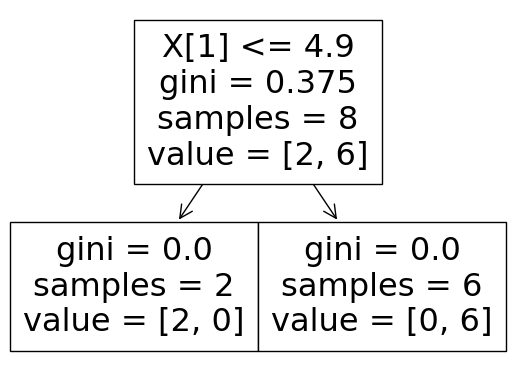

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


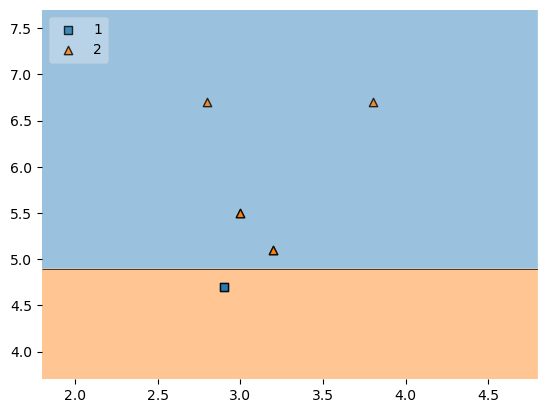

In [40]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [41]:
df_test

,sepal_width,petal_length,species
83,2.7,5.1,1
50,3.2,4.7,1
72,2.5,4.9,1
78,2.9,4.5,1
129,3.0,5.8,2


In [42]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting

In [43]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
117,3.8,6.7,2
122,2.8,6.7,2
85,3.4,4.5,1
136,3.4,5.6,2
112,3.0,5.5,2
63,2.9,4.7,1
110,3.2,5.1,2
130,2.8,6.1,2
95,3.0,4.2,1
107,2.9,6.3,2


### Random Subspace

- In random subspace we do column sampling

In [45]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [46]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
118,7.7,2.6,6.9,2.3,virginica
34,4.9,3.1,1.5,0.1,setosa
97,6.2,2.9,4.3,1.3,versicolor
68,6.2,2.2,4.5,1.5,versicolor
140,6.7,3.1,5.6,2.4,virginica
147,6.5,3.0,5.2,2.0,virginica
2,4.7,3.2,1.3,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica


In [48]:
df1.sample(2, replace=True, axis=1) #Column sampling

,petal_width,petal_width
46,0.2,0.2
91,1.4,1.4
118,2.3,2.3
34,0.1,0.1
97,1.3,1.3
68,1.5,1.5
140,2.4,2.4
147,2.0,2.0
2,0.2,0.2
139,2.1,2.1


### Random Patches

- In random sampling we do both row sampling and column sampling 

In [49]:
df1 

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
118,7.7,2.6,6.9,2.3,virginica
34,4.9,3.1,1.5,0.1,setosa
97,6.2,2.9,4.3,1.3,versicolor
68,6.2,2.2,4.5,1.5,versicolor
140,6.7,3.1,5.6,2.4,virginica
147,6.5,3.0,5.2,2.0,virginica
2,4.7,3.2,1.3,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica


In [51]:
df1.sample(8,replace=True).sample(2,replace=True, axis=1)

,sepal_width,sepal_width
68,2.2,2.2
118,2.6,2.6
68,2.2,2.2
97,2.9,2.9
91,3.0,3.0
68,2.2,2.2
97,2.9,2.9
34,3.1,3.1
